# Libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('data.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

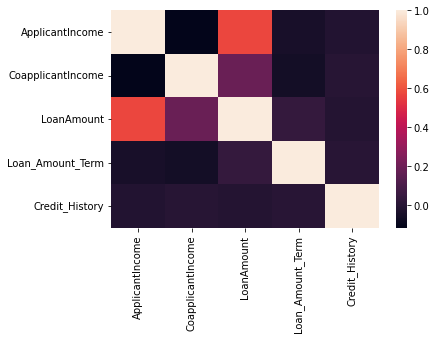

In [5]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

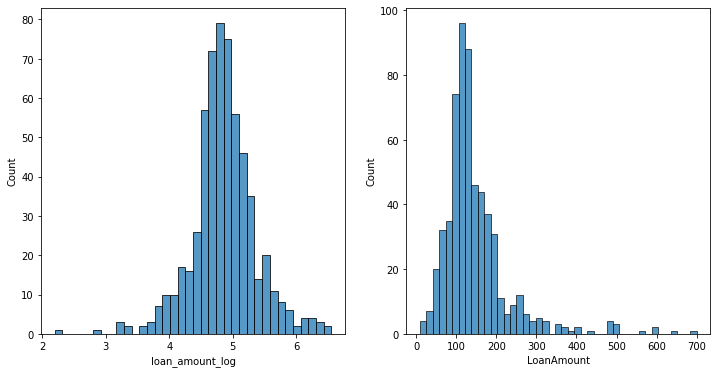

In [7]:
df['loan_amount_log'] = np.log(df['LoanAmount'])
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(data=df['loan_amount_log'], ax=ax[0])
sns.histplot(data=df['LoanAmount'], ax=ax[1])
# df['LoanAmount'].hist(bins=20)

In [8]:
df.isnull().sum()

SyntaxError: invalid syntax (127859967.py, line 1)

In [15]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['total_income_log'] = np.log(df['total_income'])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_amount_log,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## - Filling missing values

In [13]:
df.isnull().sum()
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['loan_amount_log'] = df['loan_amount_log'].fillna(df['loan_amount_log'].mean())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_amount_log      0
dtype: int64

In [27]:
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values
# y

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

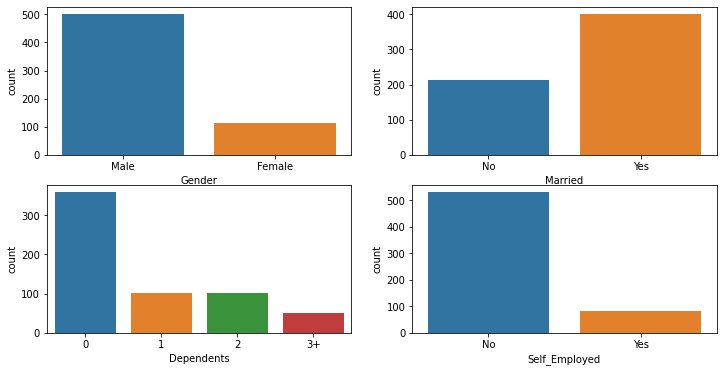

In [41]:
fig_groups, ax_group = plt.subplots(2, 2, figsize=(12,6))
sns.countplot(x = 'Gender',data=df, ax=ax_group[0][0]) 
sns.countplot(x = 'Married',data=df, ax=ax_group[0][1]) 
sns.countplot(x = 'Dependents',data=df, ax=ax_group[1][0]) 
sns.countplot(x = 'Self_Employed',data=df, ax=ax_group[1][1]) 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

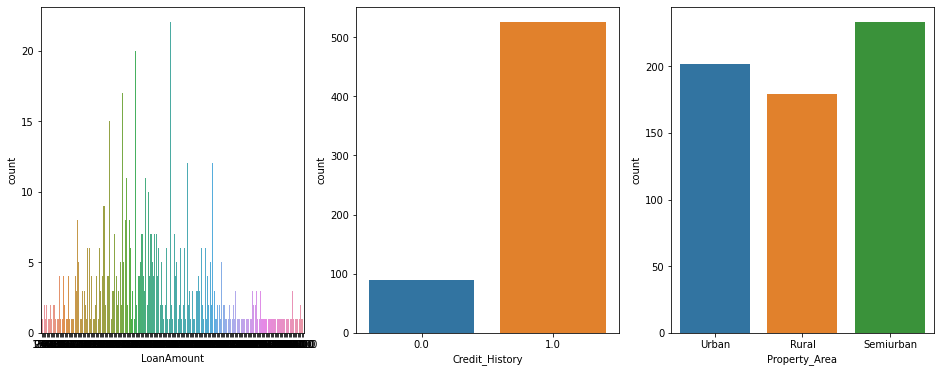

In [55]:
# print('Number of people who took loan by loan amount')
# print(df['LoanAmount'].value_counts())

fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.countplot(x='LoanAmount', data=df, ax=ax[0])
sns.countplot(x='Credit_History', data=df, ax=ax[1])
sns.countplot(x='Property_Area', data=df, ax=ax[2])

# Model prep and training

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
le = LabelEncoder()

for i in range(0,5):
    x_train[:,i] = le.fit_transform(x_train[:,i])
    x_train[:,7] = le.fit_transform(x_train[:, 7])

    

(123,)

In [81]:
y_train = le.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [142]:
for i in range(0,5):
    x_test[:,i] = le.fit_transform(x_test[:,i])
    x_test[:,7] = le.fit_transform(x_test[:, 7])

y_test = le.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [143]:
print(f'x.shape {x_train.shape} --- y.shape {y_train.shape}')

x.shape (491, 8) --- y.shape (491,)


In [149]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [145]:
print(f'x_train.shape {x_train.shape} --- y_train.shape {y_train.shape}')
print(f'x_test.shape {x_test.shape} --- y_test.shape {y_test.shape}')


x_train.shape (491, 8) --- y_train.shape (491,)
x_test.shape (123, 8) --- y_test.shape (123,)


# RandomForestClassifier

In [146]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [152]:
y_pred = rf_clf.predict(x_test)
y_pred = le.fit_transform(y_pred)
print(f'accuracy of random forest classifier: {metrics.accuracy_score(y_pred, y_test)}')
y_pred

accuracy of random forest classifier: 0.7804878048780488


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

# GaussianNB

In [155]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [158]:
nb_y_pred = nb_clf.predict(x_test)
nb_y_pred = le.fit_transform(nb_y_pred)
print(f'accuracy of naive bayes classifier: {metrics.accuracy_score(nb_y_pred, y_test)}')


accuracy of naive bayes classifier: 0.8292682926829268


# DecisionTreeClassifier

In [160]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [161]:
dt_y_pred = dt_clf.predict(x_test)
dt_y_pred = le.fit_transform(dt_y_pred)
print(f'accuracy of decision tree classifier: {metrics.accuracy_score(dt_y_pred, y_test)}')


accuracy of decision tree classifier: 0.7235772357723578


# KNeighborsClassifier

In [164]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [166]:
kn_y_pred = kn_clf.predict(x_test)
kn_y_pred = le.fit_transform(kn_y_pred)
print(f'accuracy of KNeighborsClassifier: {metrics.accuracy_score(kn_y_pred, y_test)}')


accuracy of KNeighborsClassifier: 0.7967479674796748
